In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("Cleaned_Data.csv")

In [3]:
X = df["Clean_text"]
y = df["target"]

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
pipeline = Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('classifier',BernoulliNB())
])

In [6]:
param_grid = [
    {
        'classifier' : [MultinomialNB() , BernoulliNB()],
        'vectorizer__max_features' : [None,10,100,1000,2000],
        'classifier__alpha' : [0.1,0.5,1,5,10,100]
    },
    {
        'classifier' : [GaussianNB()],
        'vectorizer__max_features' : [None,10,100,1000,2000]
    }
]

In [7]:
grid = GridSearchCV(pipeline,param_grid,cv=5,scoring='f1',n_jobs = -1)

In [8]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier', BernoulliNB())]),
             n_jobs=-1,
             param_grid=[{'classifier': [MultinomialNB(), BernoulliNB(alpha=1)],
                          'classifier__alpha': [0.1, 0.5, 1, 5, 10, 100],
                          'vectorizer__max_features': [None, 10, 100, 1000,
                                                       2000]},
                         {'classifier': [GaussianNB()],
                          'vectorizer__max_features': [None, 10, 100, 1000,
                                                       2000]}],
             scoring='f1')

In [9]:
print(grid.best_params_)

{'classifier': BernoulliNB(alpha=1), 'classifier__alpha': 1, 'vectorizer__max_features': 2000}


In [10]:
y_pred = grid.predict(X_test)

In [11]:
print(accuracy_score(y_test,y_pred))

0.7935356200527705


In [12]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       876
           1       0.78      0.70      0.74       640

    accuracy                           0.79      1516
   macro avg       0.79      0.78      0.79      1516
weighted avg       0.79      0.79      0.79      1516



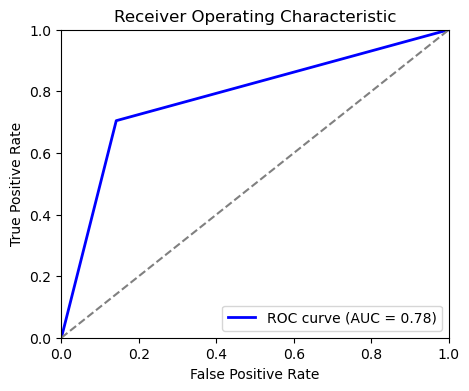

In [14]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()